In [1]:
# Imports
import os
import warnings 
import sys
import importlib
from pathlib import Path

directory = Path(os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir)))
sys.path.append(str(directory))

modules_to_reload = [
    'src.marine_plan.marineplan',
    'src.marine_plan.pre_compute',
    'src.marine_plan.post_compute.clustering',
    'src.marine_plan.post_compute.substations',
    'src.marine_plan.phasing',
]

# Reload and import each module
for module_name in modules_to_reload:
    module = importlib.import_module(module_name)
    importlib.reload(module)
    globals().update({name: getattr(module, name) for name in dir(module) if not name.startswith('_')})

from src.marine_plan.marineplan import *
from src.marine_plan.pre_compute.pre_compute import *
from src.marine_plan.post_compute.clustering import *
from src.marine_plan.post_compute.substations import *
from src.marine_plan.phasing import *


warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
original_sim_env = {
    'hubs': {
        "sorlige nordsjo 2": {"latitude": 57.853, "longitude": 4.748, "capacity": 3, "country": "NO"},
        "danish": {"latitude": 56.089, "longitude": 5.664, "capacity": 10, "country": "DK"},
        "german": {"latitude": 54.971, "longitude": 6.264, "capacity": 10, "country": "DE"},
        "dutch": {"latitude": 54.122, "longitude": 3.905, "capacity": 10, "country": "NL"},
        "PE zone": {"latitude": 51.550, "longitude": 2.470, "capacity": 3.5, "country": "BE"},
    },

    'set_cables': { 
        "NO-DK": {"from": "sorlige nordsjo 2", "to": "danish", "capacity": 2, 'designation': 'none'},
        "NO-UK": {"from": "sorlige nordsjo 2", "to": "blyth_sub", "capacity": 2, 'designation': 'single'},
        "NO-DE": {"from": "sorlige nordsjo 2", "to": "buttel", "capacity": 2, 'designation': 'single'},
        "NO-BE": {"from": "sorlige nordsjo 2", "to": "zeebrugge_sub", "capacity": 2, 'designation': 'single'},
        "GB-DK": {"from": "danish", "to": "blyth_sub", "capacity": 1.8, 'designation': 'single'},
        "DE-DK": {"from": "german", "to": "danish", "capacity": 2, 'designation': 'none'},
        "DE-NL": {"from": "german", "to": "dutch", "capacity": 2, 'designation': 'none'},
        "BE-NL": {"from": "PE zone", "to": "dutch", "capacity": 2, 'designation': 'none'},
        "LionLink": {"from": "humberside", "to": "dutch", "capacity": 1.8, 'designation': 'single'},
        "Nautilus": {"from": "sizewell", "to": "PE zone", "capacity": 1.4, 'designation': 'single'},
        "TritonLink": {"from": "PE zone", "to": "danish", "capacity": 2, 'designation': 'single'},
        "home_PE zone": {"from": "PE zone", "to": "zeebrugge_sub", "capacity": 3.5, 'designation': 'single'},
        "home_sorlige": {"from": "sorlige nordsjo 2", "to": "norway_1", "capacity": 3, 'designation': 'single'},
        "home_danish": {"from": "danish", "to": "esbjerg_sub", "capacity": 10, 'designation': 'single'},
        "home_german": {"from": "german", "to": "buttel", "capacity": 10, 'designation': 'single'},
        "home_dutch": {"from": "dutch", "to": "wijk_aan_zee", "capacity": 10, 'designation': 'single'},
    },

    ## Simulation environment
    'sim_env': {'env_name': 'generic_testing',
            'run_name': 'test',
            'config': ['msp'], 
            'result_folder': 'test',
            'goals': {},
            'hubs': {},
            'hubs_included': False,
            'set_cables': {},
            'iterative': False,
            'optimize_hubs': False,
            'port_limits': True
            },

    'sim_params': {
        'energy_targets': False,
        'country': 'all', # 'all' or 2 letter country code
        'capacity_needed': 72, # When 'all' is selected, it uses the total capacity calculated from the energy targets dictionary within the class
        'coop': False, # Adjust to True to allow placements outside of EEZ
        'synergies': False, # Deprecated
        'calc_interconnectors': False, # Deprecated
        'hub_constraints': False, # Deprecated because of turbine densities -- fix this
        'eco_limit': 3, # The maximum eco sensitivity value that is acceptable
    },

    ## Technology options - if for any reason you want to remove a technology, just set present to False
    'base_single_techs': {
            'monopile': {'present': True, 'metric_mods': {}},
            'jacket': {'present': True, 'metric_mods': {}},
            'fpv': {'present': False, 'metric_mods': {}},
            'semisub_cat_drag': {'present': False, 'metric_mods': {}},
            'semisub_taut_driv': {'present': False, 'metric_mods': {}},
            'semisub_taut_suc': {'present': False, 'metric_mods': {}},
            'spar_cat_drag': {'present': False, 'metric_mods': {}},
            'spar_taut_driv': {'present': False, 'metric_mods': {}},
            'spar_taut_suc': {'present': False, 'metric_mods': {}},
            'mussel': {'present': False, 'metric_mods': {}},
            'seaweed': {'present': False, 'metric_mods': {}},
    },

    'optimization_params': {
        'negatives': {
            'total_opex': 1,
            'total_capex': 1,
            # 'total_CO2_emission': 1.5,
            # 'total_eco_sensitivity': 9_000_000, # Ranges from ~ -2 to 3, the lower the number, the better. The only one with negative values (very good) is aquaculture
                                                # 10_000_000 is a placeholder for monetization, basically saying that 1 = 10_000_000€
        },

        'positives': {
            # 'total_energy': 1,
            # 'total_food': 1,
            'total_revenue': 1,
            # 'total_CO2_mitigation': 1.5,
            'total_CO2_net': 1,
            # 'total_LCOE': 1, # the lower the better -- so try to minimize this
            # 'total_eco_sensitivity': 9_000_000,
        },
        
        'direction': 'maximize',
        'solver': 'HiGH',
    },

    'ports_to_modify': ['leith', 'eemshaven', 'ostend'],
    'update_ports': False,
    'custom_ports': True,
    'add_hubs': False,
    

    'map_CONFIG': {
    'scale': 'international',
    'output_type': 'energy_targets',
    'msp': {
        'shipping': (True, "#333333"),
        'military': (True, "#4D4D4D"),
        'sand_extraction': (False, "#F4A460"),
        'nature_reserves': (True, "#4D4D4D"),
        'energy_zones': (False, "#000000"),
        'energy_zones_type': 'whole_zone',
        'wind_farms': (False, {
            "approved": "#FFD700",
            "planned": "#EEE8AA",
            "under_construction": "#FF7F50",
            "operational": "#008080"
        }),
        'legacy_farms': (False, "#000000"),
        'interconnectors': (False, "#000000"),
        'cables': (False, {
            "IC_to_grid": "red",
            "farm_to_IC": "#FFD700",
            "farm_to_grid": "#808080"
        })
    },
    'colours': {
        'mussel': '#800000',      
        'seaweed': '#006400',    
        'monopile': '#1A5FC1',        
        'jacket': '#00BFFF',           
        'fpv': '#FFA500',           
        'semisub_cat_drag': '#FF6347', 
        'semisub_taut_driv': '#FF6347',
        'semisub_taut_suc': '#FF6347',
        'spar_cat_drag': '#9370DB', 
        'spar_taut_driv': '#9370DB',
        'spar_taut_suc': '#9370DB',
    },
    }
}


0
All calculations complete.
Temp folder created and filled
Time taken for _load_metrics: 0.2688589096069336 seconds
Time taken for _set_criteria_metrics: 3.9088470935821533 seconds
Setting port limits
0 160
1 160
2 64
3 160
4 160
5 160
6 160
7 160
Optimal solution found for generic_testing: 287612858.4386653
Time taken for optimization: 4.356015920639038 seconds
17.76
Added boats: 5
All calculations complete.
Temp folder created and filled
8
Time taken for _load_metrics: 0.27637410163879395 seconds
Time taken for _set_criteria_metrics: 3.700632095336914 seconds
Setting port limits
0 160
1 320
2 64
3 320
4 160
5 160
6 160
7 160
Optimal solution found for generic_testing: 278407290.3575644
Time taken for optimization: 4.1289660930633545 seconds
40.32
Added boats: 10
All calculations complete.
Temp folder created and filled
16
Time taken for _load_metrics: 0.2830698490142822 seconds
Time taken for _set_criteria_metrics: 3.729321002960205 seconds
Setting port limits
0 160
1 480
2 64
3 480

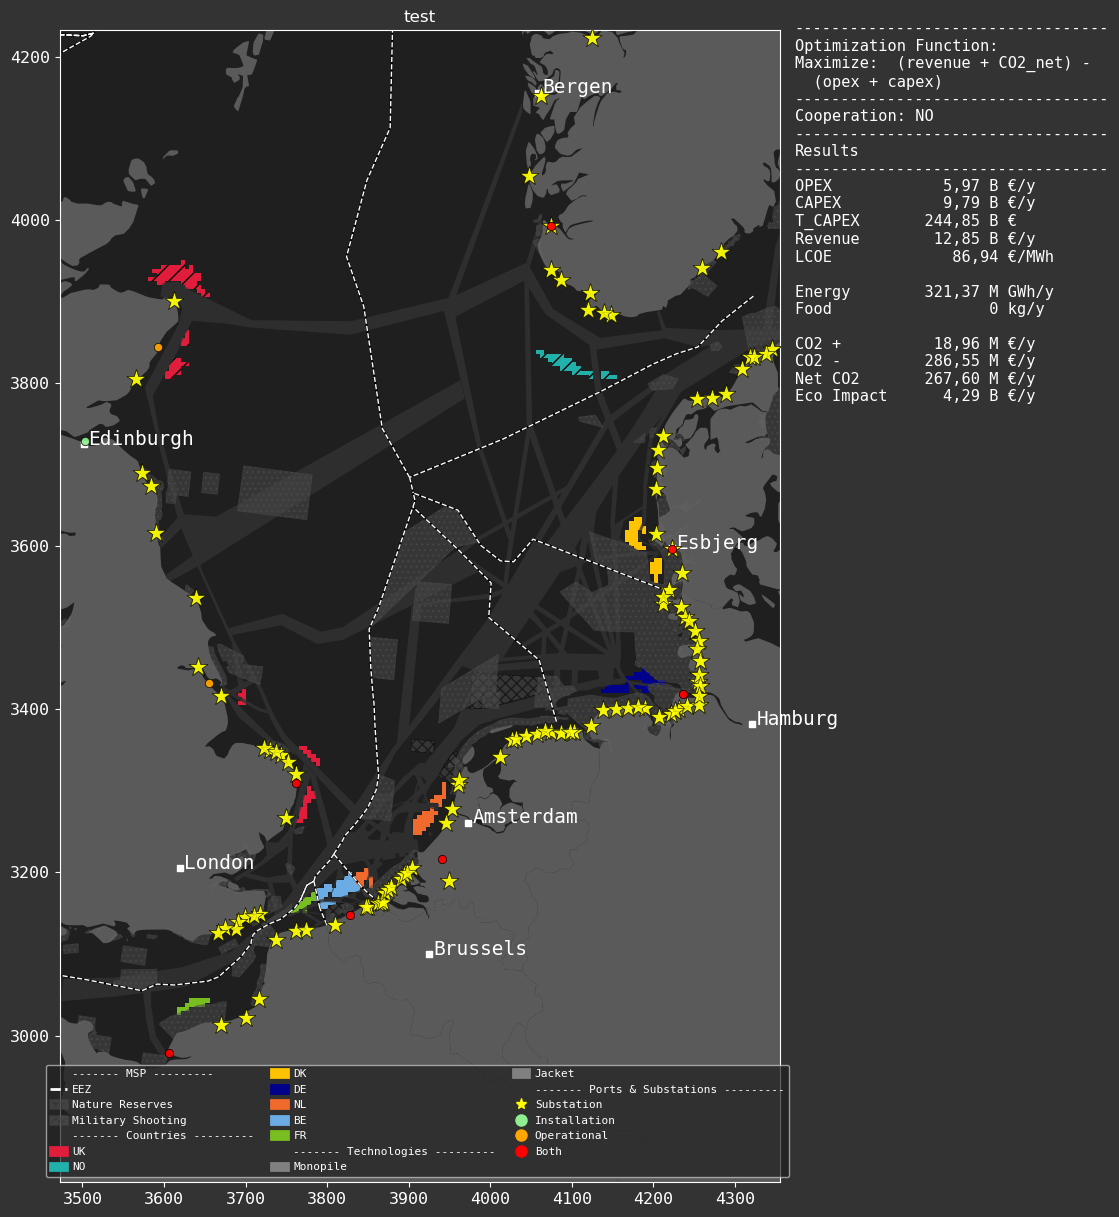

In [3]:
roadmap_phasing(directory, 'roadmap_phasing_test', {}, original_sim_env, results_folder=False, year_interval=5)

In [2]:
p = '/Users/loucas/Documents/ORG/github/marine-planning/temp/pickles/geo_data.pkl'

with open(p, 'rb') as f:
    geo_data = pickle.load(f)

In [7]:
countries = set(geo_data['country'])

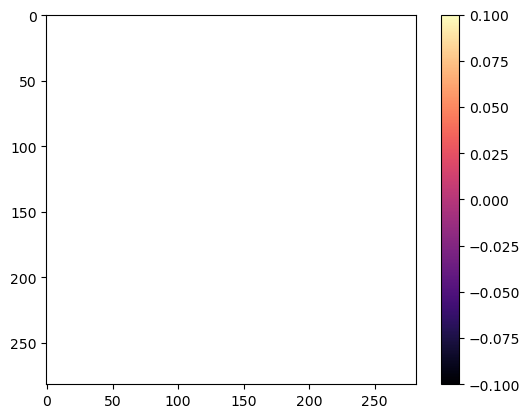

In [8]:
show(geo_data['depth'], [282,282])